In [1]:
import numpy as np

# Métodos implementados

In [4]:
def gauss_elimination(A, B):
  n = len(A)
  A_cp = A.copy()
  B_cp = B.copy()

  for i in range(n-1):
    pivot = A_cp[i,i]

    for j in range(i+1, n):
      m = (-1)*A_cp[j,i]/A_cp[i,i]
      A_cp[j,:] += A_cp[i,:]*m
      B_cp[j] += B_cp[i]*m

  return A_cp, B_cp

In [5]:
def gauss_elimination_pivoting(A, B):
  n = len(A)
  A_cp = A.copy()
  B_cp = B.copy()

  for i in range(n-1):
    pivot = A_cp[i,i]
    z = i+1
    achou = False
    linha = i

    while z < len(A_cp):
      if abs(A_cp[z,i]) > abs(pivot):
        pivot = A_cp[z,i]
        linha = z
        achou = True
      z += 1

    if achou:
      Aux = np.copy(A_cp)
      A_cp[i,:] = np.copy(A_cp[linha,:])
      A_cp[linha,:] = np.copy(Aux[i,:])
      Aux = np.copy(B_cp)
      B_cp[i] = B_cp[linha]
      B_cp[linha] = Aux[i]

    for j in range(i+1, n):
      m = (-1) * A_cp[j,i]/A_cp[i,i]
      A_cp[j,:] += A_cp[i,:]*m
      B_cp[j] += B_cp[i]*m

  return A_cp, B_cp

In [25]:
def gauss_jordan(A, B):
  n = len(A)
  A_cp = A.copy()
  B_cp = B.copy()

  for i in range(n):
    pivot = A_cp[i,i]
    A_cp[i,:] /= pivot
    B_cp[i] /= pivot

    for j in range(n):
      if j != i:
        m = (-1)*A_cp[j,i]/A_cp[i,i]
        A_cp[j,:] += A_cp[i,:]*m
        B_cp[j] += B_cp[i]*m

  return A_cp, B_cp

In [29]:
def gauss_jordan_inversa(A):
  n = len(A)
  A_cp = A.copy()
  M = np.eye(n)

  for i in range(n):
    pivot = A_cp[i,i]
    A_cp[i,:] /= pivot
    M[i,:] /= pivot

    for j in range(n):
      if j != i:
        m = (-1)*A_cp[j,i]/A_cp[i,i]
        A_cp[j,:] += A_cp[i,:]*m
        M[j,:] += M[i,:]*m

  return M

In [45]:
def solve_system_ts(A,b):
  n = len(b)
  b_cp = b.copy()
  x = np.zeros(n)
  for i in reversed(range(n)):
    for j in range(i+1, n):
      b_cp[i] -= x[j]*A[i,j]
    x[i] = b_cp[i]/A[i,i]
    # x[i] = (b[i] - np.sum(x[i+1:] * A[i,i+1:])) / A[i,i]

  return x

def solve_system_ti(A,b):
  n = len(b)
  b_cp = b.copy()
  x = np.zeros(n)
  for i in range(n):
    for j in range(0, i):
      b_cp[i] -= x[j]*A[i,j]
    x[i] = b_cp[i]/A[i,i]
    # x[i] = (b[i] - np.sum(x[:i] * A[i,:i])) / A[i,i]

  return x

In [7]:
def lu_decomp(A):
  n = A.shape[0]
  U = A.copy()
  L = np.eye(n)

  for i in range(n):
    for j in range(i+1,n):
      coef = -U[j,i]/U[i,i]
      L[j,i] = -coef
      U[j] += U[i]*coef

  return L,U

In [17]:
def solve_lu(l, u, b):
  y = solve_system_ti(l,b)
  x = solve_system_ts(u,y)
  return x

# 1 – Calcule a inversa da matriz
$A = \begin{bmatrix}
1 & 2 & -1 \\
-1 & 2 & 0 \\
2 & 1 & -1
\end{bmatrix}$
# usando eliminação gaussiana com pivoteamento parcial.

Parâmetros de entrada: matriz A;

Saída: matriz inversa

In [ ]:
A = np.array([[1,2,-1],[-1,2,0],[2,1,-1]], dtype='float')

In [ ]:
I = np.eye(3)
B1 = I[:,0].reshape(3,1)
B2 = I[:,1].reshape(3,1)
B3 = I[:,2].reshape(3,1)

In [ ]:
[Ac1,Bc1] = gauss_elimination_pivoting(A,B1)
x1 = solve_system_ts(Ac1,Bc1)

[Ac2,Bc2] = gauss_elimination_pivoting(A,B2)
x2 = solve_system_ts(Ac2,Bc2)

[Ac3,Bc3] = gauss_elimination_pivoting(A,B3)
x3 = solve_system_ts(Ac3,Bc3)

Sol = np.zeros((3,3),dtype='float')
Sol = np.column_stack((x1,x2,x3))
print(Sol)

[[-2.  1.  2.]
 [-1.  1.  1.]
 [-5.  3.  4.]]


# 2 – Resolva o seguinte sistema de equações lineares usando eliminação gaussiana  com pivoteamento parcial:

\begin{cases}
\begin{aligned}
x + y + z &= 0 \\
x + 10z &= -48 \\
10y + z &= 25
\end{aligned}
\end{cases}


In [36]:
A = np.array([[1,1,1], [1,0,10], [0,10,1]], dtype='float')
B = np.array([0,-48,25], dtype='float').reshape(3,1)

In [22]:
Ai, Bi = gauss_elimination_pivoting(A,B)
x = solve_system_ts(Ai,Bi)
x

array([ 2.,  3., -5.])

# 3 – Resolva o seguinte sistema usando eliminação gaussiana sem e com pivoteamento  parcial. Discuta, em cada caso, o resultado frente à aritmética de ponto flutuante quando 0 < |𝜺| ≪ 1
$$
\begin{bmatrix}
\epsilon & 2 \\
1 & \epsilon
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
=
\begin{bmatrix}
4 \\
3
\end{bmatrix}
$$

In [10]:
epsilon = 1e-5
A = np.array([[epsilon, 2], [1, epsilon]], dtype='float')
B = np.array([4,3], dtype='float').reshape(2,1)

a, b = gauss_elimination(A,B)
x = solve_system_ts(a,b)
x

array([2.99998 , 1.999985])

In [11]:
a, b = gauss_elimination_pivoting(A,B)
x = solve_system_ts(a,b)
x

array([2.99998 , 1.999985])

# 4 – Use a fatoração LU para resolver o seguinte sistema linear:
\begin{cases}
\begin{aligned}
x_1 + x_2 + x_3 &= -2 \\
2x_1 + x_2 - x_3 &= 1 \\
2x_1 - x_2 + x_3 &= 3
\end{aligned}
\end{cases}


In [44]:
A = np.array([[1,1,1], [2,1,-1], [2,-1,1]], dtype='float')
B = np.array([-2,1,3], dtype='float').reshape(3,1)
L, U = lu_decomp(A)

x = solve_lu(L, U, B)
x

array([ 1., -2., -1.])

In [39]:
a, b = gauss_elimination(A,B)
x = solve_system_ts(a,b)
x

array([ 1., -2., -1.])

# 5 – Use eliminação de Gauss-Jordan para resolver:

\begin{cases}
\begin{aligned}
2x_1 + x_2 - x_3 &= 1 \\
5x_1 + 2x_2 + 2x_3 &= -4 \\
3x_1 + x_2 + x_3 &= 5
\end{aligned}
\end{cases}


In [27]:
A = np.array([[2,1,-1],[5,2,2],[3,1,1]], dtype='float')
B = np.array([1,-4,5], dtype='float').reshape(3,1)

In [28]:
a, b = gauss_jordan(A,B)
x = solve_system_ts(a,b)
x

array([ 14., -32.,  -5.])

# 6 – Suponha que um time de três paraquedistas está ligado por uma corda sem peso enquanto cai, em queda livre, a uma velocidade de 5 m/s. Calcule a tensão em cada seção da corda e a aceleração do time, dado o seguinte:

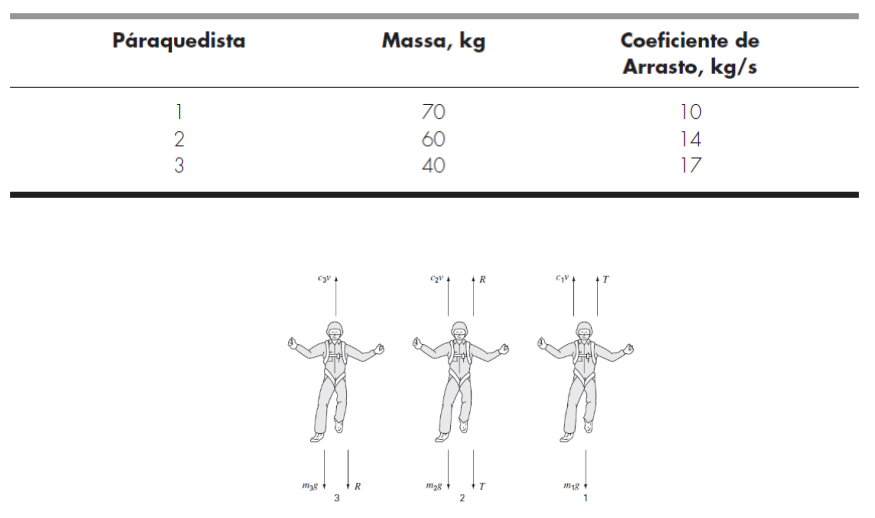

In [32]:
A = np.array([[1,-40,0],[-1,-60,1],[0,-70,-1]], dtype='float') # R, a, T
B = np.array([-307.4, -518.6, -636.7], dtype='float')

In [33]:
a, b = gauss_jordan(A,B)
x = solve_system_ts(a,b)
x

array([36.76470588,  8.60411765, 34.41176471])